<a href="https://colab.research.google.com/github/cxmedeiros/RedesNeurais/blob/main/projeto_mlp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## üß† Projeto MLP: Redes Neurais
##### Grupo: Kailane Felix (kefs), Gabriel Lopes (gls6), Camila Xavier (cxm), Luisa Mendes (mlmsp), Camila Siqueira (csl2)


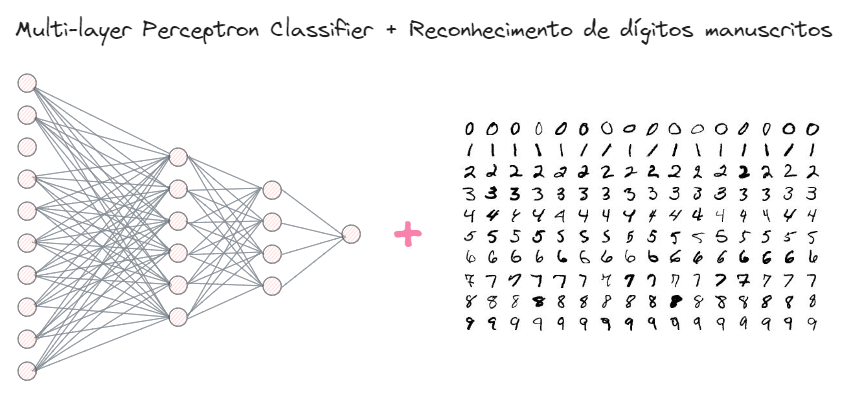

#### üéØ Objetivos:

Neste projeto, usaremos um classificador MLP em um conjunto de dados de imagens de d√≠gitos manuscritos com o objetivo de identificar quais s√£o os algarismos corretamente.

### Como funciona uma rede MLP?

Uma rede MLP (Multilayer Perceptron) √© uma arquitetura cl√°ssica de rede neural artificial, conhecida como perceptron de m√∫ltiplas camadas. Ela √© composta por v√°rias camadas de neur√¥nios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de sa√≠da. Cada neur√¥nio em uma camada est√° conectado a todos os neur√¥nios da camada seguinte, formando uma estrutura de rede densamente conectada. Essas conex√µes s√£o representadas por pesos, que s√£o ajustados durante o treinamento da rede para otimizar seu desempenho.


**Camada de entrada:**

A camada de entrada recebe os dados de entrada para a rede neural, que geralmente s√£o vetores de caracter√≠sticas num√©ricas.

**Camadas ocultas:**

As camadas ocultas est√£o localizadas entre a camada de entrada e a camada de sa√≠da.
Cada neur√¥nio em uma camada oculta recebe como entrada os valores dos neur√¥nios da camada anterior, ponderados pelos pesos correspondentes.
Em seguida, o neur√¥nio aplica uma fun√ß√£o de ativa√ß√£o para produzir uma sa√≠da. Fun√ß√µes de ativa√ß√£o comuns incluem a fun√ß√£o sigmoide (como a fun√ß√£o log√≠stica) ou a fun√ß√£o ReLU (unidade linear retificada).
A passagem dos dados atrav√©s das camadas ocultas permite que a rede aprenda representa√ß√µes n√£o lineares e capturar rela√ß√µes complexas nos dados.

**Camada de sa√≠da:**

A camada de sa√≠da recebe as sa√≠das das camadas ocultas como entrada.
Cada neur√¥nio na camada de sa√≠da produz uma resposta correspondente √† tarefa espec√≠fica que a rede est√° sendo treinada para realizar.
Dependendo do tipo de problema, pode haver diferentes fun√ß√µes de ativa√ß√£o na camada de sa√≠da. Por exemplo, para um problema de classifica√ß√£o bin√°ria, pode ser usada uma fun√ß√£o sigmoide, enquanto para um problema de classifica√ß√£o multiclasse, pode ser usada a fun√ß√£o softmax.

**Treinamento:**

Durante o treinamento, os pesos da rede s√£o ajustados para minimizar uma fun√ß√£o de perda, que mede o qu√£o bem a rede est√° realizando a tarefa.
O algoritmo de treinamento mais comum para redes MLP √© o algoritmo de retropropaga√ß√£o (backpropagation), que utiliza o gradiente descendente para atualizar os pesos da rede de forma iterativa.
O processo de treinamento envolve propagar os dados de entrada pela rede, calcular as sa√≠das, comparar com os r√≥tulos verdadeiros e ajustar os pesos com base nos erros cometidos.

**Em resumo:**

A capacidade de uma rede MLP em aprender a partir de dados e realizar tarefas de classifica√ß√£o, regress√£o ou outras tarefas depende da escolha apropriada da arquitetura da rede, fun√ß√µes de ativa√ß√£o, algoritmo de treinamento e ajuste dos hiperpar√¢metros relevantes.

√â importante ressaltar que as redes MLP s√£o uma das muitas arquiteturas de rede neural dispon√≠veis e t√™m sido amplamente utilizadas como uma base fundamental para o desenvolvimento de modelos mais complexos e avan√ßados.

#### ‚úÖ Checklist:

- Hiperpar√¢metros que podem ser variados no MLP
  - Drop-out ‚úÖ
  - Tamanho da rede ‚úÖ
  - Taxa de aprendizagem ‚úÖ
  - Fun√ß√£o de ativa√ß√£o ‚úÖ
  - Algoritmo de aprendizagem ‚úÖ
- M√©tricas para avaliar
  - Taxas de acerto por cada classe ‚úÖ
  - Acur√°cia, precision, recall totais‚úÖ
- Relat√≥rio descrevendo os experimentos experimenta√ß√£o comentada e relatado os resultados de melhorias/perdas de desempenho

#### üîÅ Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### üìö Importando as bibliotecas necess√°rias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#### üé≤ Importando os dados

In [ ]:
def get_mnist():
    # The code to download the mnist data original came from
    # https://cntk.ai/pythondocs/CNTK_103A_MNIST_DataLoader.html

    import gzip
    import os
    import struct

    from urllib.request import urlretrieve

    def load_data(src, num_samples):    #carregar os dados de imagem MNIST
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                # Read magic number.
                if n[0] != 0x3080000:
                    raise Exception("Invalid file: unexpected magic number.")
                # Read number of entries.
                n = struct.unpack(">I", gz.read(4))[0]
                if n != num_samples:
                    raise Exception(
                        "Invalid file: expected {0} entries.".format(num_samples)
                    )
                crow = struct.unpack(">I", gz.read(4))[0]
                ccol = struct.unpack(">I", gz.read(4))[0]
                if crow != 28 or ccol != 28:
                    raise Exception(
                        "Invalid file: expected 28 rows/cols per image."
                    )
                # Read data.
                res = np.frombuffer(
                    gz.read(num_samples * crow * ccol), dtype=np.uint8
                )
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples, crow, ccol)) / 256  #a matriz √© remodelada para ter a forma correta


    def load_labels(src, num_samples):  #carregar os r√≥tulos correspondentes aos dados MNIST
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                # Read magic number.
                if n[0] != 0x1080000:
                    raise Exception("Invalid file: unexpected magic number.")
                # Read number of entries.
                n = struct.unpack(">I", gz.read(4))
                if n[0] != num_samples:
                    raise Exception(
                        "Invalid file: expected {0} rows.".format(num_samples)
                    )
                # Read labels.
                res = np.frombuffer(gz.read(num_samples), dtype=np.uint8)
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples))


    def try_download(data_source, label_source, num_samples):
        data = load_data(data_source, num_samples)
        labels = load_labels(label_source, num_samples)
        return data, labels

    # Not sure why, but yann lecun's website does no longer support
    # simple downloader. (e.g. urlretrieve and wget fail, while curl work)
    # Since not everyone has linux, use a mirror from uni server.
    #     server = 'http://yann.lecun.com/exdb/mnist'
    server = 'https://raw.githubusercontent.com/fgnt/mnist/master'

    # URLs for the train image and label data
    url_train_image = f'{server}/train-images-idx3-ubyte.gz'
    url_train_labels = f'{server}/train-labels-idx1-ubyte.gz'
    num_train_samples = 60000

    print("Downloading train data")
    train_features, train_labels = try_download(url_train_image, url_train_labels, num_train_samples)

    # URLs for the test image and label data
    url_test_image = f'{server}/t10k-images-idx3-ubyte.gz'
    url_test_labels = f'{server}/t10k-labels-idx1-ubyte.gz'
    num_test_samples = 10000

    print("Downloading test data")
    test_features, test_labels = try_download(url_test_image, url_test_labels, num_test_samples)

    return train_features, train_labels, test_features, test_labels

In [ ]:
train_features, train_labels, test_features, test_labels = get_mnist()

Done.
Done.
Done.
Done.


#### üëÄ Dando uma olhada na estrutura geral dos dados

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

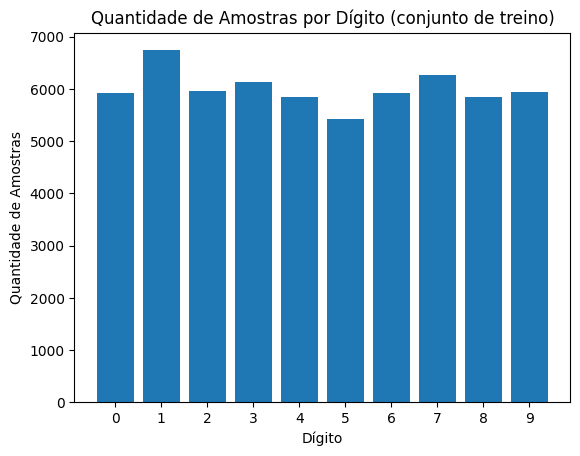

In [ ]:
unique_digits, counts = np.unique(train_labels, return_counts=True)

plt.bar(unique_digits, counts)
plt.xlabel('D√≠gito')
plt.ylabel('Quantidade de Amostras')
plt.title('Quantidade de Amostras por D√≠gito (conjunto de treino)')
plt.xticks(unique_digits)
plt.show()

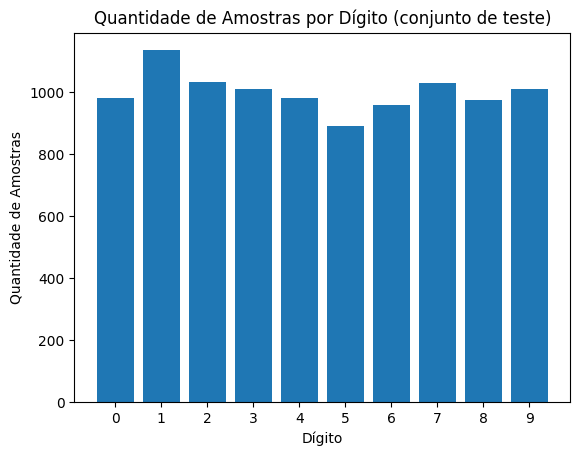

In [ ]:
unique_digits, counts = np.unique(test_labels, return_counts=True)

plt.bar(unique_digits, counts)
plt.xlabel('D√≠gito')
plt.ylabel('Quantidade de Amostras')
plt.title('Quantidade de Amostras por D√≠gito (conjunto de teste)')
plt.xticks(unique_digits)
plt.show()

In [ ]:
print(train_features.shape)

(60000, 28, 28)


In [ ]:
print(test_features.shape)

(10000, 28, 28)


#### ‚öôÔ∏è Redimensionando os dados para usarmos no MLP:

In [ ]:
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

In [ ]:
train_features.shape

(60000, 784)

In [ ]:
train_labels.shape

(60000,)

#### üèãÔ∏è Treinando...

Nesse primeiro momento vamos treinar a rede MLP em sua configura√ß√£o padr√£o

In [ ]:
mlp = MLPClassifier(random_state=42)
clf = mlp.fit(train_features, train_labels)

In [ ]:
y_pred = clf.predict(test_features)

#### ü§î Analisando o Classification Report do modelo

In [ ]:
class_report = classification_report(test_labels, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### üéØ Acur√°cia:

A acur√°cia mede a capacidade geral do modelo de reconhecer corretamente os d√≠gitos. Ela indica a propor√ß√£o de d√≠gitos corretamente classificados em rela√ß√£o ao n√∫mero total de d√≠gitos.

No contexto do reconhecimento de d√≠gitos, a acur√°cia √© uma m√©trica ampla que fornece uma vis√£o geral do desempenho do modelo em todos os d√≠gitos. Uma alta acur√°cia indica que o modelo est√° classificando corretamente a maioria dos d√≠gitos, enquanto uma baixa acur√°cia indica que o modelo est√° cometendo muitos erros em suas predi√ß√µes.

#### üéØ Precis√£o:

Uma alta precis√£o indica que o modelo faz poucas predi√ß√µes incorretas de um determinado d√≠gito, enquanto uma baixa precis√£o indica que o modelo est√° fazendo muitas predi√ß√µes incorretas de um d√≠gito em rela√ß√£o ao total de predi√ß√µes positivas.

No contexto do reconhecimento de d√≠gitos, a precis√£o √© especialmente relevante quando o objetivo √© minimizar os falsos positivos, ou seja, quando √© mais importante evitar a classifica√ß√£o incorreta de um d√≠gito espec√≠fico do que identificar todos os exemplos desse d√≠gito corretamente.

Portanto, a precis√£o em um problema de reconhecimento de d√≠gitos fornece uma medida da capacidade do modelo de fazer predi√ß√µes corretas para um d√≠gito espec√≠fico em rela√ß√£o ao total de predi√ß√µes positivas desse d√≠gito.

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.9908163265306122
Acur√°cia da classe 1 : 0.9911894273127754
Acur√°cia da classe 2 : 0.9699612403100775
Acur√°cia da classe 3 : 0.9762376237623762
Acur√°cia da classe 4 : 0.9765784114052953
Acur√°cia da classe 5 : 0.9708520179372198
Acur√°cia da classe 6 : 0.9791231732776617
Acur√°cia da classe 7 : 0.97568093385214
Acur√°cia da classe 8 : 0.9630390143737166
Acur√°cia da classe 9 : 0.977205153617443


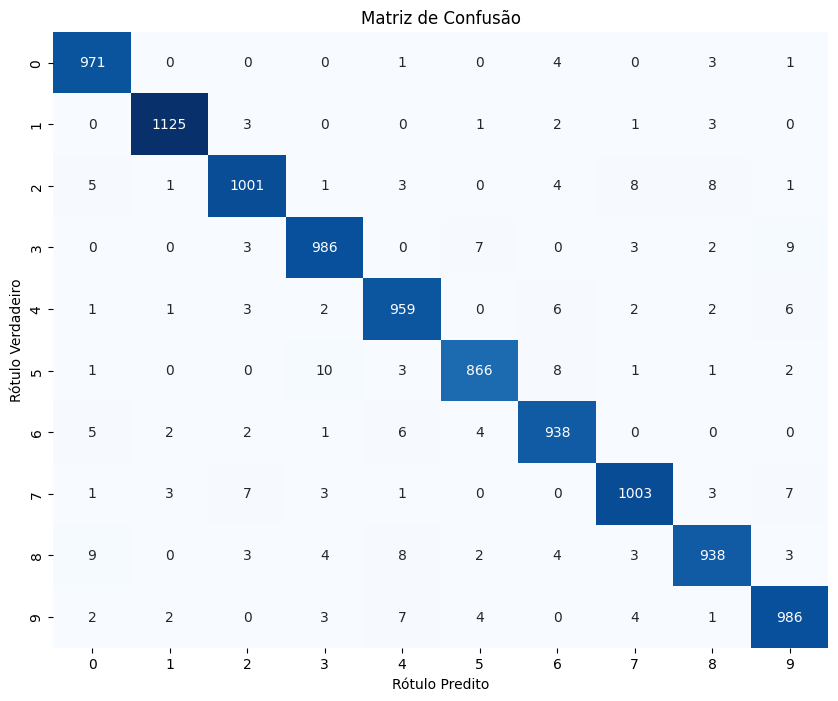

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confus√£o')
plt.xlabel('R√≥tulo Predito')
plt.ylabel('R√≥tulo Verdadeiro')
plt.show()

Os resultados do treinamento apenas em sua configura√ß√£o padr√£o j√° s√£o excelentes. O problema de reconhecimento de d√≠gitos manuscritos j√° √© trivial quando olhamos para todo o desenvolvimento da √°rea de redes neurais e deep learning.

Sendo assim, os experimentos a seguir ter√£o como principal objetivo entender como a varia√ß√£o dos hiperpar√¢metros pode afetar o desempenho do modelo, tanto positivamente quanto negativamente.

## Visualiza√ß√£o dos pesos da primeira camada oculta

Neste gr√°fico de subplots, estamos visualizando os pesos da primeira camada oculta de um modelo de rede neural multilayer perceptron. Cada subplot representa um neur√¥nio na camada oculta e mostra os padr√µes aprendidos pelo modelo para cada neur√¥nio. A escala de cinza √© utilizada para representar os valores dos pesos, onde os pixels mais claros indicam valores maiores de peso e os pixels mais escuros indicam valores menores de peso.


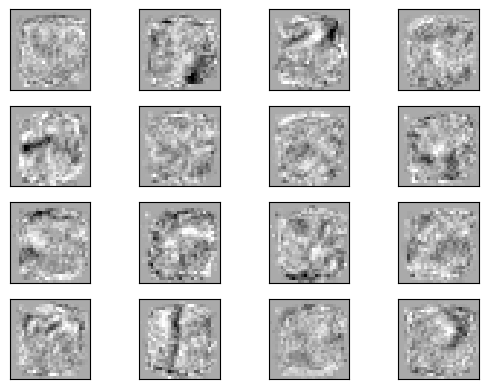

In [ ]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#### ‚ùå Visualizando as predi√ß√µes incorretas do modelo

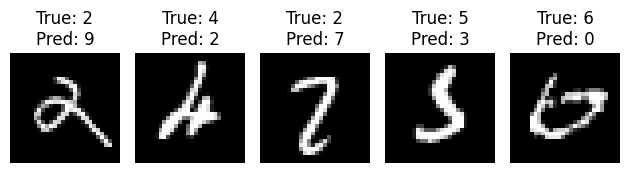

In [ ]:
incorrect_indices = np.where(y_pred != test_labels)[0]

num_samples = 5

for i in range(num_samples):
    index = incorrect_indices[i]
    image = test_features[index].reshape(28, 28)
    label = test_labels[index]
    prediction = y_pred[index]

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {label}\nPred: {prediction}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### üîãMelhorando o modelo (fine tuning) atrav√©s do GridSearchCV

Existem in√∫meros hiperpar√¢metros que podem ser ajustados em modelos, e encontrar a combina√ß√£o ideal deles pode ser considerado um desafio de busca. Atualmente, h√° diversos algoritmos de otimiza√ß√£o dispon√≠veis para essa tarefa, mas uma t√©cnica simples √© a GridSearch!

Para ajustar os hiperpar√¢metros no scikit-learn, pode-se utilizar o m√©todo GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperpar√¢metros dentre os fornecidos.

*Tentamos usar essa abordagem mas tivemos problemas em rela√ß√£o ao tempo de computa√ß√£o, mesmo diminuindo o espa√ßo de par√¢metros o experimento foi prejudicado, ent√£o decidimos deixar no rolat√≥rio apenas os experimentos individuais!*

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10),(20,), (100, 100, 100), (100,), (30, 40, 20), (50, 80, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

- hidden_layer_sizes: define o n√∫mero de camadas e o n√∫mero de n√≥s que desejamos ter no classificador de rede neural. Assim, o comprimento da tupla denota o n√∫mero total de camadas ocultas na rede.
- activation: indica fun√ß√£o de ativa√ß√£o para as camadas ocultas.
- solver: especifica o algoritmo para otimiza√ß√£o de peso entre os n√≥s.
- alpha: termo de regulariza√ß√£o, ou termo de penalidade, que combate o overfitting restringindo o tamanho dos pesos
- learning_rate: taxa de aprendizado para atualiza√ß√µes de peso

In [ ]:
from sklearn.model_selection import GridSearchCV

# clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
# clf_tuned.fit(X, y)

#### üîé Observando a melhor combina√ß√£o de par√¢metros encontrada


In [ ]:
# print('Best parameters found:\n', clf_tuned.best_params_)

In [ ]:
# clf_tuned = MLPClassifier(hidden_layer_sizes=(100,),
                            # random_state = 21,
                            # activation='relu',
                            # alpha=0.05,
                            # solver= 'sgd',
                            # early_stopping=True,
                            # learning_rate= 'constant')

#### üîãMelhorando o modelo (fine tuning) atrav√©s do experimentos isolados

Aqui vamos fazer alguns testes variando um hiperpar√¢metro por vez com objetivo de identificar como cada um deles pode afetar o desempenho do modelo.

### Testar varia√ß√£o do hiperpar√¢metro "learning_rate"

A taxa de aprendizado controla a velocidade com que o modelo ajusta os pesos durante o processo de treinamento.

Durante o treinamento de uma rede neural, os pesos s√£o atualizados iterativamente com base nos gradientes calculados em rela√ß√£o √† fun√ß√£o de perda. A taxa de aprendizado determina o tamanho do passo que os pesos ir√£o dar em dire√ß√£o ao m√≠nimo da fun√ß√£o de perda. Uma taxa de aprendizado alta pode fazer com que os pesos oscilem em torno do m√≠nimo global, resultando em treinamento inst√°vel ou divergente. Por outro lado, uma taxa de aprendizado muito baixa pode fazer com que o treinamento seja lento e que o modelo fique preso em m√≠nimos locais ou pontos de sela.

In [ ]:
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    clf = MLPClassifier(learning_rate_init=lr)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Taxa de aprendizagem: {lr}, Acur√°cia: {accuracy}, Precis√£o: {precision}")

Taxa de aprendizagem: 0.001, Acur√°cia: 0.9774, Precis√£o: 0.9774214128312355
Taxa de aprendizagem: 0.01, Acur√°cia: 0.9735, Precis√£o: 0.9735271389675955
Taxa de aprendizagem: 0.1, Acur√°cia: 0.9085, Precis√£o: 0.9242522898147454


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.963265306122449
Acur√°cia da classe 1 : 0.9638766519823788
Acur√°cia da classe 2 : 0.8691860465116279
Acur√°cia da classe 3 : 0.8158415841584158
Acur√°cia da classe 4 : 0.9032586558044806
Acur√°cia da classe 5 : 0.852017937219731
Acur√°cia da classe 6 : 0.918580375782881
Acur√°cia da classe 7 : 0.9085603112840467
Acur√°cia da classe 8 : 0.946611909650924
Acur√°cia da classe 9 : 0.9345887016848364


### Testar varia√ß√£o do hiperpar√¢metro "hidden_layer_sizes"

O par√¢metro hidden_layer_sizes permite especificar o n√∫mero de camadas ocultas e o n√∫mero de neur√¥nios em cada camada. Por exemplo, [10, 20, 10] indica que a rede ter√° tr√™s camadas ocultas, com 10 neur√¥nios na primeira camada, 20 neur√¥nios na segunda camada e 10 neur√¥nios na terceira camada.

A escolha adequada do hidden_layer_sizes depende do problema em quest√£o e da complexidade dos dados. Geralmente, aumentar o n√∫mero de camadas ocultas e o n√∫mero de neur√¥nios em cada camada pode permitir que a rede aprenda representa√ß√µes mais complexas dos dados, mas tamb√©m pode aumentar a possibilidade de overfitting se o modelo se ajustar muito bem aos dados de treinamento.

In [ ]:
network_sizes = [[5], [100], [100, 100], [100, 100, 100]]

for size in network_sizes:

    clf = MLPClassifier(hidden_layer_sizes=size)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Tamanho da rede: {size}, Acur√°cia: {accuracy}, Precis√£o: {precision}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tamanho da rede: [5], Acur√°cia: 0.8978, Precis√£o: 0.8976099104549987
Tamanho da rede: [100], Acur√°cia: 0.9771, Precis√£o: 0.9771283061637598
Tamanho da rede: [100, 100], Acur√°cia: 0.9752, Precis√£o: 0.9753168805024689
Tamanho da rede: [100, 100, 100], Acur√°cia: 0.9812, Precis√£o: 0.981217116356483


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.9897959183673469
Acur√°cia da classe 1 : 0.9911894273127754
Acur√°cia da classe 2 : 0.9815891472868217
Acur√°cia da classe 3 : 0.9772277227722772
Acur√°cia da classe 4 : 0.9796334012219959
Acur√°cia da classe 5 : 0.9798206278026906
Acur√°cia da classe 6 : 0.9801670146137788
Acur√°cia da classe 7 : 0.9776264591439688
Acur√°cia da classe 8 : 0.9763860369609856
Acur√°cia da classe 9 : 0.977205153617443


Esses resultados sugerem que aumentar o tamanho da rede neural, adicionando camadas e neur√¥nios, pode melhorar o desempenho em problemas de reconhecimento de d√≠gitos. No entanto, √© importante ter em mente que o aumento do tamanho da rede tamb√©m pode levar a um aumento na complexidade do modelo e a um maior custo computacional durante o treinamento e a infer√™ncia. Portanto, √© necess√°rio encontrar um equil√≠brio entre a capacidade do modelo e a efici√™ncia computacional para obter os melhores resultados.

### Testar varia√ß√£o do hiperpar√¢metro "activation"

In [ ]:
activation_functions = ['logistic', 'tanh', 'relu']

for activation in activation_functions:
    clf = MLPClassifier(activation=activation)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Fun√ß√£o de ativa√ß√£o: {activation}, Acur√°cia: {accuracy}, Precis√£o: {precision}")

Fun√ß√£o de ativa√ß√£o: logistic, Acur√°cia: 0.9779, Precis√£o: 0.9779016242927013
Fun√ß√£o de ativa√ß√£o: tanh, Acur√°cia: 0.9778, Precis√£o: 0.9778147403999903
Fun√ß√£o de ativa√ß√£o: relu, Acur√°cia: 0.9793, Precis√£o: 0.979321498976997


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.9897959183673469
Acur√°cia da classe 1 : 0.9903083700440528
Acur√°cia da classe 2 : 0.9748062015503876
Acur√°cia da classe 3 : 0.9811881188118812
Acur√°cia da classe 4 : 0.9837067209775967
Acur√°cia da classe 5 : 0.9753363228699552
Acur√°cia da classe 6 : 0.9812108559498957
Acur√°cia da classe 7 : 0.9776264591439688
Acur√°cia da classe 8 : 0.9691991786447639
Acur√°cia da classe 9 : 0.9682854311199207


In [ ]:
class_report = classification_report(test_labels, y_pred)
print(class_report)

### Testar varia√ß√£o do hiperpar√¢metro "solver"

In [ ]:
learning_algorithms = ['lbfgs', 'sgd', 'adam']

for algorithm in learning_algorithms:
    clf = MLPClassifier(solver=algorithm)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Algoritmo de aprendizagem: {algorithm}, Acur√°cia: {accuracy}, Precis√£o: {precision}")

Algoritmo de aprendizagem: lbfgs, Acur√°cia: 0.9765, Precis√£o: 0.976528804435195


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Algoritmo de aprendizagem: sgd, Acur√°cia: 0.9717, Precis√£o: 0.9717092284719998
Algoritmo de aprendizagem: adam, Acur√°cia: 0.9771, Precis√£o: 0.9771358685271149


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.9877551020408163
Acur√°cia da classe 1 : 0.9894273127753304
Acur√°cia da classe 2 : 0.9709302325581395
Acur√°cia da classe 3 : 0.9762376237623762
Acur√°cia da classe 4 : 0.9775967413441955
Acur√°cia da classe 5 : 0.9775784753363229
Acur√°cia da classe 6 : 0.9791231732776617
Acur√°cia da classe 7 : 0.9688715953307393
Acur√°cia da classe 8 : 0.9702258726899384
Acur√°cia da classe 9 : 0.9722497522299306


#### Implementando e testando a varia√ß√£o do hiperpar√¢metro "drop-out"

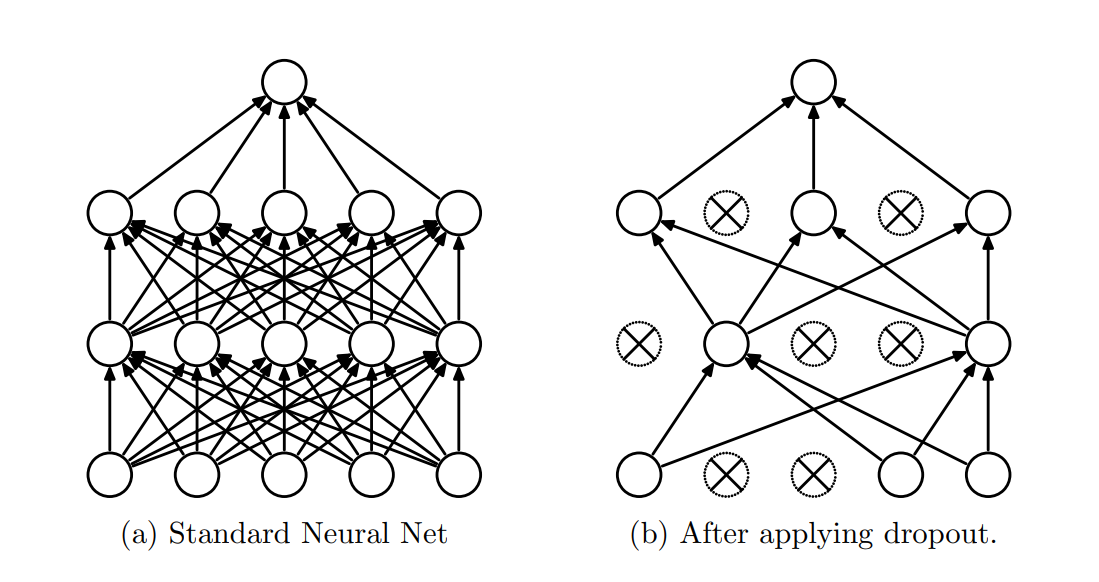

O Dropout √© uma t√©cnica de regulariza√ß√£o amplamente utilizada em redes neurais, incluindo o contexto de redes MLP (Multilayer Perceptron). O Dropout √© um m√©todo de combate ao overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas n√£o generaliza bem para novos dados.

O Dropout funciona desligando aleatoriamente um n√∫mero espec√≠fico de unidades de neur√¥nios durante o treinamento de uma rede neural. Essas unidades de neur√¥nios desligadas s√£o temporariamente ignoradas durante o forward pass (propaga√ß√£o direta) e o backward pass (retropropaga√ß√£o) do treinamento. Isso significa que essas unidades n√£o contribuem para o c√°lculo dos gradientes e, portanto, n√£o atualizam seus pesos durante o treinamento.

Ao desligar aleatoriamente um subconjunto das unidades de neur√¥nios em cada atualiza√ß√£o de treinamento, o Dropout imp√µe uma esp√©cie de ru√≠do aos dados e evita que os neur√¥nios se tornem excessivamente dependentes de outros neur√¥nios espec√≠ficos para fazerem previs√µes. Isso ajuda a reduzir o overfitting, pois obriga a rede neural a aprender representa√ß√µes mais robustas e distribu√≠das dos dados.

O Dropout √© aplicado apenas durante o treinamento. Durante a fase de teste ou infer√™ncia, todas as unidades de neur√¥nios s√£o consideradas ativas, mas suas sa√≠das s√£o escaladas pela probabilidade de reten√ß√£o utilizada durante o treinamento. Isso garante que o modelo obtenha previs√µes consistentes e corretas em novos dados.

In [ ]:
# Creating a custom MLPDropout classifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.neural_network._base import ACTIVATIONS, DERIVATIVES, LOSS_FUNCTIONS
from sklearn.utils import shuffle, gen_batches, check_random_state, _safe_indexing
from sklearn.utils.extmath import safe_sparse_dot
import warnings
from sklearn.exceptions import ConvergenceWarning

class MLPDropout(MLPClassifier):

    def __init__(
        self,
        hidden_layer_sizes=(100,),
        activation="relu",
        *,
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=200,
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000,
        dropout = None,
    ):

        self.dropout = dropout
        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            batch_size=batch_size,
            learning_rate=learning_rate,
            learning_rate_init=learning_rate_init,
            power_t=power_t,
            max_iter=max_iter,
            shuffle=shuffle,
            random_state=random_state,
            tol=tol,
            verbose=verbose,
            warm_start=warm_start,
            momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1,
            beta_2=beta_2,
            epsilon=epsilon,
            n_iter_no_change=n_iter_no_change,
            max_fun=max_fun,
        )

    def _fit_stochastic(
        self,
        X,
        y,
        activations,
        deltas,
        coef_grads,
        intercept_grads,
        layer_units,
        incremental,
    ):
        params = self.coefs_ + self.intercepts_
        if not incremental or not hasattr(self, "_optimizer"):
            if self.solver == "sgd":
                self._optimizer = SGDOptimizer(
                    params,
                    self.learning_rate_init,
                    self.learning_rate,
                    self.momentum,
                    self.nesterovs_momentum,
                    self.power_t,
                )
            elif self.solver == "adam":
                self._optimizer = AdamOptimizer(
                    params,
                    self.learning_rate_init,
                    self.beta_1,
                    self.beta_2,
                    self.epsilon,
                )

        # early_stopping in partial_fit doesn't make sense
        early_stopping = self.early_stopping and not incremental
        if early_stopping:
            # don't stratify in multilabel classification
            should_stratify = is_classifier(self) and self.n_outputs_ == 1
            stratify = y if should_stratify else None
            X, X_val, y, y_val = train_test_split(
                X,
                y,
                random_state=self._random_state,
                test_size=self.validation_fraction,
                stratify=stratify,
            )
            if is_classifier(self):
                y_val = self._label_binarizer.inverse_transform(y_val)
        else:
            X_val = None
            y_val = None

        n_samples = X.shape[0]
        sample_idx = np.arange(n_samples, dtype=int)

        if self.batch_size == "auto":
            batch_size = min(200, n_samples)
        else:
            if self.batch_size < 1 or self.batch_size > n_samples:
                warnings.warn(
                    "Got `batch_size` less than 1 or larger than "
                    "sample size. It is going to be clipped"
                )
            batch_size = np.clip(self.batch_size, 1, n_samples)

        try:
            for it in range(self.max_iter):
                if self.shuffle:
                    # Only shuffle the sample indices instead of X and y to
                    # reduce the memory footprint. These indices will be used
                    # to slice the X and y.
                    sample_idx = shuffle(sample_idx, random_state=self._random_state)

                accumulated_loss = 0.0
                for batch_slice in gen_batches(n_samples, batch_size):
                    if self.shuffle:
                        X_batch = _safe_indexing(X, sample_idx[batch_slice])
                        y_batch = y[sample_idx[batch_slice]]
                    else:
                        X_batch = X[batch_slice]
                        y_batch = y[batch_slice]

                    activations[0] = X_batch
                    # (DROPOUT ADDITION) layer_units passed forward to help build dropout mask.
                    batch_loss, coef_grads, intercept_grads = self._backprop(
                        X_batch,
                        y_batch,
                        activations,
                        layer_units,
                        deltas,
                        coef_grads,
                        intercept_grads,
                    )
                    accumulated_loss += batch_loss * (
                        batch_slice.stop - batch_slice.start
                    )

                    # update weights
                    grads = coef_grads + intercept_grads
                    self._optimizer.update_params(params, grads)

                self.n_iter_ += 1
                self.loss_ = accumulated_loss / X.shape[0]

                self.t_ += n_samples
                self.loss_curve_.append(self.loss_)
                if self.verbose:
                    print("Iteration %d, loss = %.8f" % (self.n_iter_, self.loss_))

                # update no_improvement_count based on training loss or
                # validation score according to early_stopping
                self._update_no_improvement_count(early_stopping, X_val, y_val)

                # for learning rate that needs to be updated at iteration end
                self._optimizer.iteration_ends(self.t_)

                if self._no_improvement_count > self.n_iter_no_change:
                    # not better than last `n_iter_no_change` iterations by tol
                    # stop or decrease learning rate
                    if early_stopping:
                        msg = (
                            "Validation score did not improve more than "
                            "tol=%f for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )
                    else:
                        msg = (
                            "Training loss did not improve more than tol=%f"
                            " for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )

                    is_stopping = self._optimizer.trigger_stopping(msg, self.verbose)
                    if is_stopping:
                        break
                    else:
                        self._no_improvement_count = 0

                if incremental:
                    break

                if self.n_iter_ == self.max_iter:
                    warnings.warn(
                        "Stochastic Optimizer: Maximum iterations (%d) "
                        "reached and the optimization hasn't converged yet."
                        % self.max_iter,
                        ConvergenceWarning,
                    )
        except KeyboardInterrupt:
            warnings.warn("Training interrupted by user.")

        if early_stopping:
            # restore best weights
            self.coefs_ = self._best_coefs
            self.intercepts_ = self._best_intercepts

    def _backprop(self, X, y, activations, layer_units, deltas, coef_grads, intercept_grads):

        n_samples = X.shape[0]
        dropout_masks = None

        # Create the Dropout Mask (DROPOUT ADDITION)
        if self.dropout != None:
            if 0 < self.dropout < 1:
                keep_probability = 1 - self.dropout
                dropout_masks = [np.ones(layer_units[0])]

                # Create hidden Layer Dropout Masks
                for units in layer_units[1:-1]:
                    # Create inverted Dropout Mask, check for random_state
                    if self.random_state != None:
                        layer_mask = (self._random_state.random(units) < keep_probability).astype(int) / keep_probability
                    else:
                        layer_mask = (np.random.rand(units) < keep_probability).astype(int) / keep_probability
                    dropout_masks.append(layer_mask)
            else:
                raise ValueError('Dropout must be between zero and one. If Dropout=X then, 0 < X < 1.')

        # Forward propagate
        # Added dropout_makss to _forward_pass call (DROPOUT ADDITION)
        activations = self._forward_pass(activations, dropout_masks)

        # Get loss
        loss_func_name = self.loss
        if loss_func_name == "log_loss" and self.out_activation_ == "logistic":
            loss_func_name = "binary_log_loss"
        loss = LOSS_FUNCTIONS[loss_func_name](y, activations[-1])
        # Add L2 regularization term to loss
        values = 0
        for s in self.coefs_:
            s = s.ravel()
            values += np.dot(s, s)
        loss += (0.5 * self.alpha) * values / n_samples

        # Backward propagate
        last = self.n_layers_ - 2

        # The calculation of delta[last] here works with following
        # combinations of output activation and loss function:
        # sigmoid and binary cross entropy, softmax and categorical cross
        # entropy, and identity with squared loss
        deltas[last] = activations[-1] - y

        # Compute gradient for the last layer
        self._compute_loss_grad(
            last, n_samples, activations, deltas, coef_grads, intercept_grads
        )

        inplace_derivative = DERIVATIVES[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 2, 0, -1):
            deltas[i - 1] = safe_sparse_dot(deltas[i], self.coefs_[i].T)
            inplace_derivative(activations[i], deltas[i - 1])

            self._compute_loss_grad(
                i - 1, n_samples, activations, deltas, coef_grads, intercept_grads
            )

        # Apply Dropout Masks to the Parameter Gradients (DROPOUT ADDITION)
        if dropout_masks != None:
            for layer in range(len(coef_grads)-1):
                mask = (~(dropout_masks[layer+1] == 0)).astype(int)
                coef_grads[layer] = coef_grads[layer] * mask[None, :]
                coef_grads[layer+1] = (coef_grads[layer+1] * mask.reshape(-1, 1))
                intercept_grads[layer] = intercept_grads[layer] * mask

        return loss, coef_grads, intercept_grads

    def _forward_pass(self, activations, dropout_masks=None):

        hidden_activation = ACTIVATIONS[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 1):
            activations[i + 1] = safe_sparse_dot(activations[i], self.coefs_[i])
            activations[i + 1] += self.intercepts_[i]

            # For the hidden layers
            if (i + 1) != (self.n_layers_ - 1):
                hidden_activation(activations[i + 1])

            # Apply Dropout Mask (DROPOUT ADDITION)
            if (i + 1) != (self.n_layers_ - 1) and dropout_masks != None:
                check1 = activations[i].copy()
                activations[i+1] = activations[i+1] * dropout_masks[i+1][None, :]

        # For the last layer
        output_activation = ACTIVATIONS[self.out_activation_]
        output_activation(activations[i + 1])
        return activations

In [ ]:
droup_out = [0.1, 0.3, 0.5]

for dp in droup_out:

    clf = MLPDropout(dropout=dp)

    # 4.2. Treinar o modelo com os dados de treinamento
    clf.fit(train_features, train_labels)

    # 4.3. Avaliar o desempenho do modelo usando os dados de teste
    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    # 4.4. Imprimir os resultados (algoritmo de aprendizagem, acur√°cia e precis√£o)
    print(f"Drop-out: {dp}, Acur√°cia: {accuracy}, Precis√£o: {precision}")

Drop-out: 0.1, Acur√°cia: 0.9813, Precis√£o: 0.9813178978393705
Drop-out: 0.3, Acur√°cia: 0.9798, Precis√£o: 0.9798641923622965
Drop-out: 0.5, Acur√°cia: 0.9754, Precis√£o: 0.9754695830621806


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acur√°cia da classe", class_label, ":", accuracy)

Acur√°cia da classe 0 : 0.986734693877551
Acur√°cia da classe 1 : 0.986784140969163
Acur√°cia da classe 2 : 0.9835271317829457
Acur√°cia da classe 3 : 0.9782178217821782
Acur√°cia da classe 4 : 0.9775967413441955
Acur√°cia da classe 5 : 0.9674887892376681
Acur√°cia da classe 6 : 0.9801670146137788
Acur√°cia da classe 7 : 0.9708171206225681
Acur√°cia da classe 8 : 0.9620123203285421
Acur√°cia da classe 9 : 0.958374628344896


O trade-off relacionado √† quantidade de regulariza√ß√£o aplicada ao modelo:

Valores baixos de dropout podem permitir que o modelo se ajuste melhor aos dados de treinamento, mas com maior risco de overfitting. Valores altos de dropout podem aumentar a capacidade de generaliza√ß√£o, mas com o custo de reduzir a capacidade de ajuste aos dados de treinamento.

A escolha do valor adequado de dropout depende do conjunto de dados, da complexidade do problema e da arquitetura da rede neural. √â comum realizar experimentos com diferentes valores de dropout para encontrar um equil√≠brio adequado entre a capacidade de aprendizado e a regulariza√ß√£o.

No entanto, houve pouca varia√ß√£o no desempenho para os valores de drop out usados, todos os resultados s√£o √≥timos para o problema em quest√£o.